In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

ticker = "AAPL"
start_date = "2019-03-31"
end_date = "2022-03-31"

stock_data = yf.download(ticker, start = start_date, end=end_date)

stock_data = stock_data.reset_index()

# removing the trailing space - explicitly rename columns 
stock_data.columns = ['Date',  'Adj Close', 'Close','High', 'Low', 'Open', 'Volume']

# changing the date format
#stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')

stock_data

[*********************100%***********************]  1 of 1 completed


,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-04-01 00:00:00+00:00,45.911144,47.810001,47.919998,47.095001,47.910000,111448000
1,2019-04-02 00:00:00+00:00,46.578545,48.505001,48.615002,47.762501,47.772499,91062800
2,2019-04-03 00:00:00+00:00,46.897842,48.837502,49.125000,48.287498,48.312500,93087200
3,2019-04-04 00:00:00+00:00,46.979465,48.922501,49.092499,48.285000,48.697498,76457200
4,2019-04-05 00:00:00+00:00,47.293964,49.250000,49.275002,48.982498,49.112499,74106400
...,...,...,...,...,...,...,...
752,2022-03-24 00:00:00+00:00,171.671448,174.070007,174.139999,170.210007,171.059998,90131400
753,2022-03-25 00:00:00+00:00,172.312439,174.720001,175.279999,172.750000,173.880005,80546200
754,2022-03-28 00:00:00+00:00,173.180344,175.600006,175.729996,172.000000,172.169998,90371900
755,2022-03-29 00:00:00+00:00,176.494049,178.960007,179.009995,176.339996,176.690002,100589400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       757 non-null    datetime64[ns, UTC]
 1   Adj Close  757 non-null    float64            
 2   Close      757 non-null    float64            
 3   High       757 non-null    float64            
 4   Low        757 non-null    float64            
 5   Open       757 non-null    float64            
 6   Volume     757 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 41.5 KB


<Axes: >

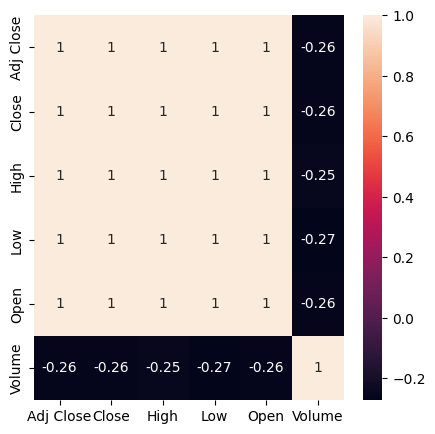

In [79]:
# exploratory data analysis

stock_data.info()

corr_matrix = stock_data.iloc[:,1:7].corr()
 
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True)

Text(0, 0.5, 'Closing price (USD)')

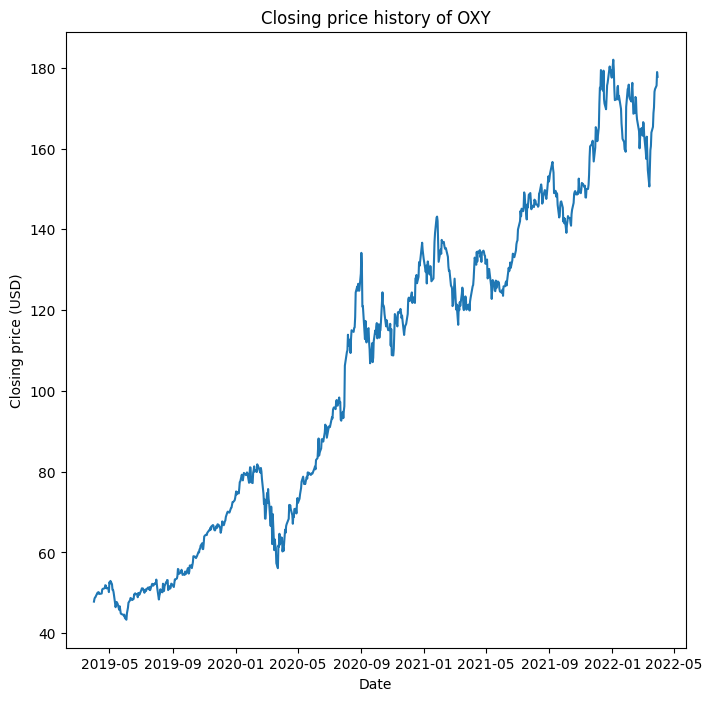

In [80]:
plt.figure(figsize=(8,8))
plt.title('Closing price history of OXY')
plt.plot(stock_data['Date'], stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price (USD)')

In [81]:
# build the regression model
x = stock_data[['Adj Close', 'High', 'Low', 'Open', 'Volume']].values
y = stock_data['Close'].values

# data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=33)
7
# feature scaling
# standard scaler - mean of 0, variance of 1
# minmax scaler - min, max of (0,1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# multi linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_mlr = lin_reg.predict(x_test)

# put in a dataframe
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlr})

# model evaluation
# r^2: 0 - not a very good model, 1 - able to predict the variability; ideally 0.5 and above
# mean absolute error: a lower value means the errors are small overall
# mean squared error: second moment of the estimator - if there's no bias then this is the variance of the estimator
# root mean squared error: square root of MSE - if there's no bias then this is the standard deviation of the estimator

MAE = metrics.mean_absolute_error(y_test, y_pred_mlr)
MSE = metrics.mean_squared_error(y_test, y_pred_mlr)
R2 = metrics.r2_score(y_test, y_pred_mlr)
RMSE = metrics.root_mean_squared_error(y_test, y_pred_mlr)

print(R2)
print(MSE)

0.9999775582185725
0.036879211633202916


In [82]:
# support vector regressor
svr = SVR(kernel='linear')
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

MAE = metrics.mean_absolute_error(y_test, y_pred_svr)
MSE = metrics.mean_squared_error(y_test, y_pred_svr)
R2 = metrics.r2_score(y_test, y_pred_svr)
RMSE = metrics.root_mean_squared_error(y_test, y_pred_svr)

print(R2)
print(MSE)

0.9997630412134927
0.3894010492967473


In [83]:
# random forest regressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(x_train,y_train)
y_pred_rf = reg.predict(x_test)

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

MAE = metrics.mean_absolute_error(y_test, y_pred_rf)
MSE = metrics.mean_squared_error(y_test, y_pred_rf)
R2 = metrics.r2_score(y_test, y_pred_rf)
RMSE = metrics.root_mean_squared_error(y_test, y_pred_rf)

print(R2)
print(MSE)

0.9998519028442244
0.2433722281705649
